## File computing the parameters of the probability functions characterizing the thermogenesis

In [24]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [25]:
# Definition of exponential function
def exp(x, a, b):
    return a*np.exp(b*x)

### Computation of a PDF defining the bee's thermogenesis activation probability

Area 3.6371756260549377


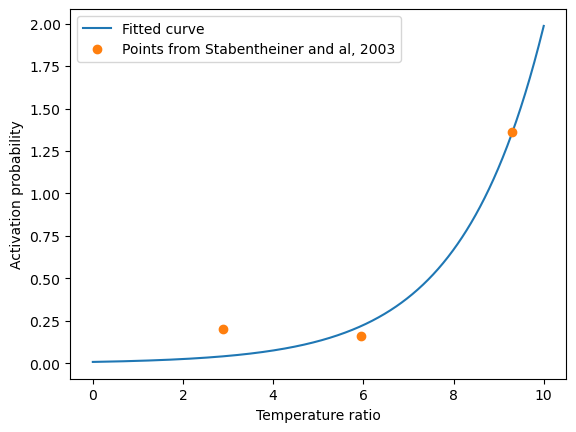

In [26]:
"""
Data from Stabentheiner et al, 2003
For Tamb, we take Tchill because Tamb in Stabentheiner is inferior to the chill coma temperature
For Tmax, we take the mean abdomen temperature of bees in the core and add 1.5 degrees. This number is equal to half of the 3 degrees
bandwith considered in the paper.
T_activate is between 0 and 10 to obtain a probability function always laying between 0 and 1.
"""

Tamb = 9
Tmax = 29+1.5
Temp_mean = np.array([15.2, 21.8, 29])
x_activate = 10*(Temp_mean - Tamb)/(Tmax - Tamb)

#Active/passive bees ratio
y_activate = np.array([4/20, 7/43, 15/11])

# Fit an exponential function to the data
param_activate, cov = curve_fit(exp, x_activate, y_activate)

# Plot the data and the fitted curve
x = np.linspace(0, 10, 1000)
exp_activate = exp(x, param_activate[0], param_activate[1])

plt.figure()
plt.plot(x, exp_activate, label='Fitted curve')
plt.plot(x_activate, y_activate, 'o', label='Points from Stabentheiner and al, 2003')
plt.xlabel('Temperature ratio')
plt.ylabel('Activation probability')
plt.legend()

print('Area', np.trapz(exp_activate, x))

Area 1.0000000000000002
Parameters of the activation probability function [0.00237655 0.54371327]


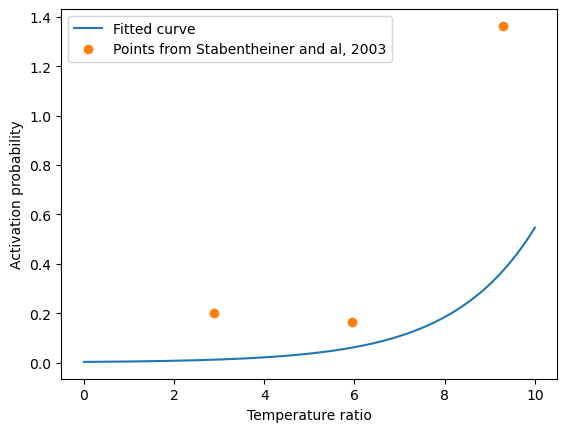

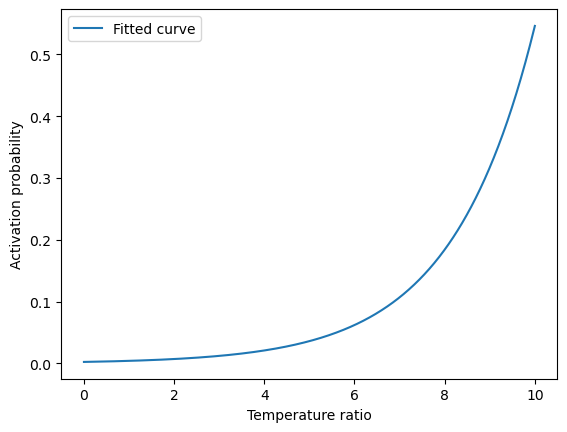

In [27]:
# Shift the function to obtain an area equal to 1

area_activate = np.trapz(exp_activate, x)
exp_act_norm = exp_activate/area_activate   

#Plot with the data points
plt.figure()
plt.plot(x, exp_act_norm, label='Fitted curve')
plt.plot(x_activate, y_activate, 'o', label='Points from Stabentheiner and al, 2003')
plt.xlabel('Temperature ratio')
plt.ylabel('Activation probability')
plt.legend()

#Plot without the data points
plt.figure()
plt.plot(x, exp_act_norm, label='Fitted curve')
plt.xlabel('Temperature ratio')
plt.ylabel('Activation probability')
plt.legend()

print('Area', np.trapz(exp_act_norm, x))

# Computation of the final parameters of the activation probability function
param_final, cov = curve_fit(exp, x, exp_act_norm)
print('Parameters of the activation probability function', param_final)

### Computation of a PDF characterizing the bee's thermogenesis temperature

##### Plot of the data contained in Stabentheiner et al, 2003 and their corresponding fitted curves

Text(0.5, 1.0, 'Core bee layer')

<Figure size 640x480 with 0 Axes>

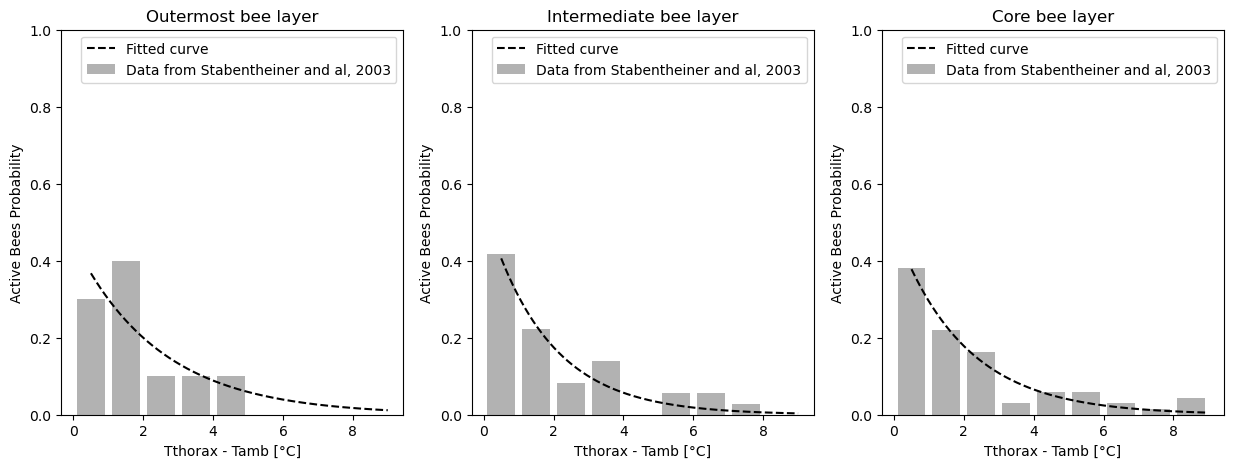

In [28]:
temp = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])

# Outermost bee layer
y_out_ = np.array([3, 4, 1, 1, 1, 0, 0, 0, 0])
y_out = y_out_/np.sum(y_out_)
param_out, cov = curve_fit(exp, temp, y_out)

# Intermediate bee layer
y_int_ = np.array([15, 8, 3, 5, 0, 2, 2, 1, 0])
y_int = y_int_/np.sum(y_int_)
param_int, cov = curve_fit(exp, temp, y_int)

# Core bee layer
y_cor_ = np.array([26, 15, 11, 2, 4, 4, 2, 1, 3])
y_cor = y_cor_/np.sum(y_cor_)
param_cor, cov = curve_fit(exp, temp, y_cor)


# Subplots of the data and the corresponding fitted curves
x = np.linspace(0.5, 9, 10000)
exp_out = exp(x, param_out[0], param_out[1])
exp_int = exp(x, param_int[0], param_int[1])
exp_cor = exp(x, param_cor[0], param_cor[1])

plt.figure()
fig, ax = plt.subplots(1,3, figsize=(15, 5))

ax[0].plot(x, exp_out, label='Fitted curve', color='black', linestyle='--')
ax[0].bar(temp, y_out, label='Data from Stabentheiner and al, 2003', color= (0.5, 0.5, 0.5, 0.6))
ax[0].set_xlabel('Tthorax - Tamb [°C]')
ax[0].set_ylabel('Active Bees Probability')
ax[0].legend()
ax[0]. set_ylim(0, 1)
ax[0].set_title('Outermost bee layer')

ax[1].plot(x, exp_int, label='Fitted curve', color='black', linestyle='--')
ax[1].bar(temp, y_int, label='Data from Stabentheiner and al, 2003', color= (0.5, 0.5, 0.5, 0.6))
ax[1].set_xlabel('Tthorax - Tamb [°C]')
ax[1].set_ylabel('Active Bees Probability')
ax[1].legend()
ax[1]. set_ylim(0, 1)
ax[1].set_title('Intermediate bee layer')

ax[2].plot(x, exp_cor, label='Fitted curve', color='black', linestyle='--')
ax[2].bar(temp, y_cor, label='Data from Stabentheiner and al, 2003', color= (0.5, 0.5, 0.5, 0.6))
ax[2].set_xlabel('Tthorax - Tamb [°C]')
ax[2].set_ylabel('Active Bees Probability')
ax[2].legend()
ax[2]. set_ylim(0, 1)
ax[2].set_title('Core bee layer')


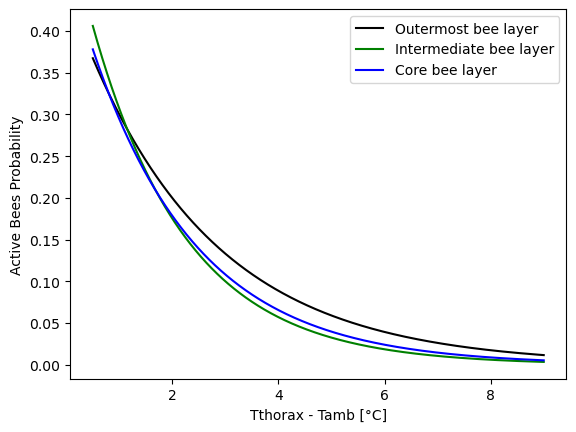

In [29]:
plt.figure()
plt.xlabel('Tthorax - Tamb [°C]')
plt.ylabel('Active Bees Probability')
plt.plot(x, exp_out, label='Outermost bee layer', color='black')
plt.plot(x, exp_int, label='Intermediate bee layer', color='green')
plt.plot(x, exp_cor, label='Core bee layer', color='blue')
plt.legend()

##### Convertion of each function to a PDF (area = 1)

In [30]:
Area_out = np.trapz(exp_out, x)
exp_out_norm = exp_out/Area_out

Area_int = np.trapz(exp_int, x)
exp_int_norm = exp_int/Area_int

Area_cor = np.trapz(exp_cor, x)
exp_cor_norm = exp_cor/Area_cor

print('Area under the outermost bee layer curve', np.trapz(exp_out_norm, x))
print('Area under the intermediate bee layer curve', np.trapz(exp_int_norm, x))
print('Area under the core bee layer curve', np.trapz(exp_cor_norm, x))

Area under the outermost bee layer curve 1.0
Area under the intermediate bee layer curve 1.0
Area under the core bee layer curve 0.9999999999999999


##### Calculation of the area difference between the curves

In [31]:
diff_out_int = np.trapz(abs(exp_out - exp_int), x)
diff_out_cor = np.trapz(abs(exp_out - exp_cor), x)
diff_int_cor = np.trapz(abs(exp_int - exp_cor), x)

print('Area difference between outermost and intermediate bee layers', diff_out_int)
print('Area difference between outermost and core bee layers', diff_out_cor)
print('Area difference between intermediate and core bee layers', diff_int_cor)

Area difference between outermost and intermediate bee layers 0.18047651130545903
Area difference between outermost and core bee layers 0.13463097785741052
Area difference between intermediate and core bee layers 0.0536666040130006


Since the maxiumum area difference is equal to 2, we consider that a difference of 0.18 is small enough to be neglected. Therefore, a single curve corresponding to the mean of the three others will be considered to characterize the bees' thermogenesis temperature for every layers.

##### Computation and plot of the mean function characterizing the three layers

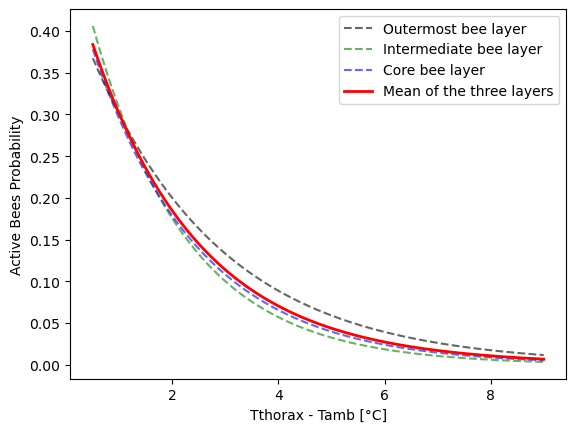

In [32]:
exp_mean = (exp_out + exp_int + exp_cor)/3

plt.figure()
plt.xlabel('Tthorax - Tamb [°C]')
plt.ylabel('Active Bees Probability')
plt.plot(x, exp_out, label='Outermost bee layer', color='black', linestyle='--',    alpha=0.6)
plt.plot(x, exp_int, label='Intermediate bee layer', color='green', linestyle='--', alpha=0.6)
plt.plot(x, exp_cor, label='Core bee layer', color='blue', linestyle='--', alpha=0.6)
plt.plot(x, exp_mean, label='Mean of the three layers', color='red', linewidth=2)
plt.legend()

##### Normalization of the mean function

Parameters of the normalized mean function [ 0.62456025 -0.48346942]
Area of the normalized mean function:  0.9977751236778689


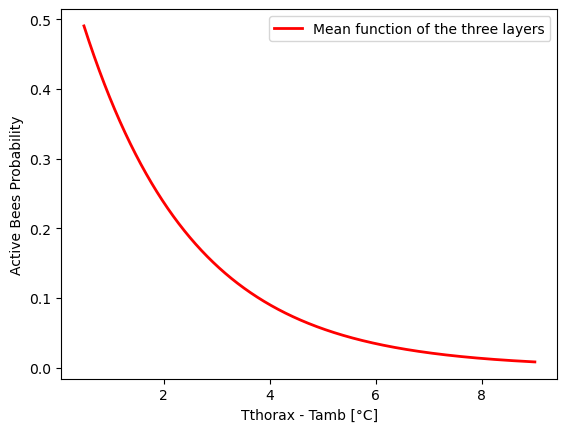

In [33]:
# Obtain an area of one under the mean curve
area_mean = np.trapz(exp_mean, x)
exp_norm = exp_mean/area_mean

# Compute the final parameters for the probability function
param_norm, cov = curve_fit(exp, x, exp_norm)

#Plot the final probability function
exp_final = exp(x, param_norm[0], param_norm[1])

plt.figure()
plt.xlabel('Tthorax - Tamb [°C]')
plt.ylabel('Active Bees Probability')
plt.plot(x, exp_final, label='Mean function of the three layers', color='red', linewidth=2)
plt.legend()

print('Parameters of the normalized mean function', param_norm)
print('Area of the normalized mean function: ', np.trapz(exp_final, x))